# **Machine Learning**

1. Simple Linear Regression
2. Multiple Variable Linear Regression
3. Logistic Regression
4. Regularization

# **1. Simple Linear Regression**

In [ ]:
import numpy as np
import sympy
from matplotlib import pyplot

%matplotlib inline
sympy.init_printing()

## 1.1 Linear Regression

Linear Regression은 종속 변수(변수, 결과) $y$와 한 개 이상의 독립 변수(입력, 원인) $X$의 선형 관계를 모델링하는 방법이다. 

선형 관계를 모델링한다는 것은 데이터를 가장 잘 설명하는 최적의 직선을 찾아내는 것이다. 즉, 찾아낸 직선을 사용하여 $y$와 $X$의 관계를 도출하는 것이다. 

그 중, $X$가 하나인 simple linear regression으로 실습을 진행하겠습니다. 변수가 하나인 직선을 정의하겠습니다.

$$f(x_i)=wx_i+b$$

<center>
<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/residuals.png
" width="400" height="300" />
</center>

우리의 데이터를 가장 잘 설명하는 직선은 예측값과 실제값이 가장 비슷해야 합니다. 우리의 모델이 예측한 결과는 $f(x_i)$이며 실제 데이터는 $y$입니다.

이때, 실제 데이터(위 그림에서 빨간 점)와 직선 사이의 차이를 줄이는 것이 목적입니다. 이를 위해 이를 바탕으로 cost function을 다음과 같이 정의할 수 있습니다.

$$cost\;function={1\over N}\sum_{i=1}^N (y_i-f(x_i))^2$$

그리고 만든 cost function을 최소로 하는 $w$와 $b$를 찾아야 한다. 이를 위해 우리는 ANalytically와 Gradient descent를 이용해 찾아볼 것이다.

### Analytically

다음의 식이 주어질 때, 식의 최솟값을 찾는 방법은 미분값이 0이 되는 값을 찾는 것이다.

$$f(w)=w^2+3w-5$$

이를 sympy와 numpy를 통해 구해보겠습니다.

In [3]:
w = sympy.Symbol('w', real=True)

f = w**2 + 3*w - 5
f

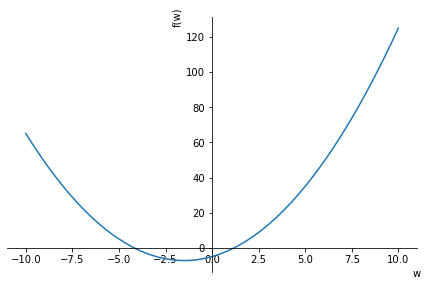

In [4]:
sympy.plotting.plot(f);

1차 미분한 식은 다음과 같이 알아볼 수 있습니다.

In [5]:
fprime = f.diff(w)
fprime

그리고 해당 식의 해는 다음과 같이 구할 수 있다.

In [6]:
sympy.solve(fprime, w)

### Gradient Descent

Gradient descent는 cost function의 $w$와 $b$의 최적값을 찾는 방법 중 하나로 기울기가 작은 방향으로 계속해서 이동하는 방법이다. 극소점이 여러 개면(non-convex function) 최적값을 찾기 까다롭지만 극소점이 하나라면(convec function) 최적값을 찾기 쉬워진다. 

<img src="https://nbviewer.jupyter.org/github/engineersCode/EngComp6_deeplearning/blob/master/images/descent.png
" width="400" height="300" />

Single linear regression에 경우 gradient descent는 

$$\theta_j := \theta_j - \alpha {\partial \over \partial \theta_j} J(\theta_0, \theta_1) \; (for\;j = 0\; and\; j = 1, \; \alpha\;is\;learning\;rate)\\
(J(\theta_0, \theta_1)\; is\; f(x_i),\; \theta_0=b,\; \theta_1=w)$$

을 반복함으로 구할 수 있다. 미분값 앞에 붙은 -로 인해 항상 기울기가 작아지는 방향으로 움직인다. 그리고 learning rate $\alpha$는 한 번에 이동할 거리를 정할 수 있다. 

이를 코드를 이용헤 구현해보겠습니다.


In [7]:
fpnum = sympy.lambdify(w, fprime) # type: function

w = 10.0 # starting guess for the min
for i in range(1000):
    w = w - fpnum(w) * 0.01 # with 0.01 alpha

print(w)


-1.4999999806458753


위에서 볼 수 있듯이 두 가지 방법이 같은 값이 나오는 것을 확인할 수 있습니다. 

### 데이터 만들기

실제로 linear한 관계를 가진 데이터 셋을 사용하기 위해 직접 데이터 셋을 만들어보도록 하겠습니다. 이때, Numpy 안에 Normal distribution 함수를 통해 조금의 noise를 추가하여 생서앟도록 하겠습니다.

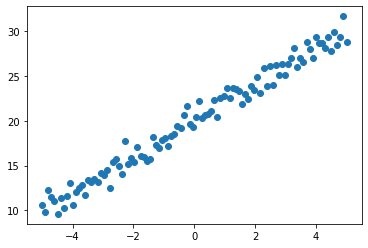

In [9]:
x_data = np.linspace(-5, 5, 100) # -5 ~ 5 사이의 100개의 데이터 생성
w_true = 2
b_true = 20

y_data = w_true*x_data + b_true + np.random.normal(size=len(x_data))

pyplot.scatter(x_data, y_data);

먼저 데이터의 cost function을 나타내면

In [11]:
w, b, x, y = sympy.symbols('w b x y')

cost_function = (w*x + b - y)**2
cost_function

으로 나타낼 수 있다. 이제 $w$와 $b$의 초기값을 정의하고 gradient descent 방법을 적용하여 cost function을 최소로 하는 $w$와 $b$를 구할 수 있다.

In [12]:
grad_b = sympy.lambdify([w, b, x, y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w, b, x, y], cost_function.diff(w), 'numpy')

w, b = 0, 0 # w, b의 초기값
for i in range(1000):
    descent_b = np.sum(grad_b(w, b, x_data, y_data))/len(x_data)
    descent_w = np.sum(grad_w(w, b, x_data, y_data))/len(x_data)
    w = w - descent_w * 0.01 # alpha = 0.01
    b = b - descent_b * 0.01 # alpha = 0.01
    
print(w)
print(b)

2.0254061088339155
20.079921356708898


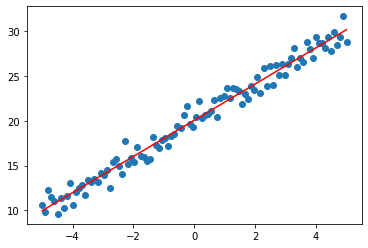

In [13]:
pyplot.scatter(x_data, y_data)
pyplot.plot(x_data, w*x_data + b, '-r');

우리가 구한 직선이 만든 데이터 셋과 잘 맞는 것을 볼 수 있다.

## 1.2 Earth temperature over time

그렇다면 위에서 배운 것들로 시간 흐름에 따른 지구의 온도 변화를 분석할 수 있다. 

Global temperature anomaly라는 지표를 통해서 분석해보겠습니다. 여기서 temperature anomaly는 어떠한 기준 온도 값을 정해놓고 그것과 차이를 나타낸 것입니다. 예를 들어 temperature anomaly가 양수의 높은 값을 가지면 평소보다 따뜻한 기온을, 음수의 작은 값이라면 평소보다 차가운 기온을 가졌단 것을 알려줍니다.

세계 여러 지역의 온도가 각각 다 다르기 때문에 global temperature anomaly를 사용해서 분석을 사용하겠습니다. 

### Step 1: Read a data file

먼저 NOAA(National Oceanic and Atmospheric Administration) 홈페이지에서 데이터를 가져옵니다. 

In [26]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'data/land_global_temperature_anomaly-1880-2016.csv')

('data/land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x2e77f58f310>)

다운로드한 데이터를 numpy를 이용해 불러오겠습니다.

In [27]:
fname = 'data/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = np.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

### Step 2: Plot the data

matplotlib을 이용해 2D plot을 찍어보면

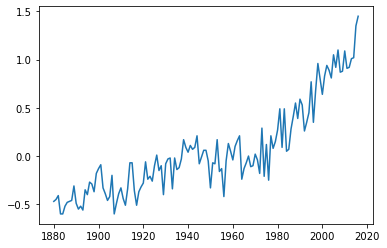

In [18]:
pyplot.plot(year, temp_anomaly);

위의 plot에 여러 정보를 추가하여 나타내면

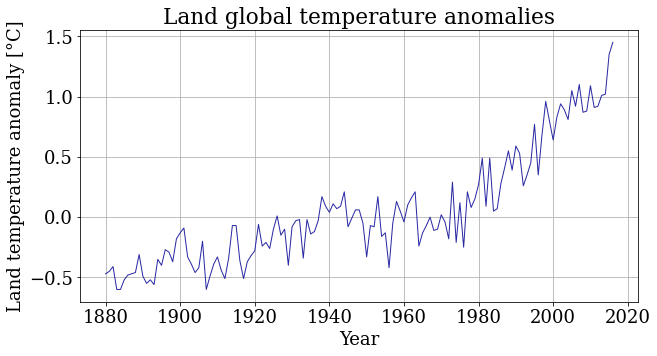

In [20]:
pyplot.rc('font', family='serif', size=18)
pyplot.figure(figsize=(10, 5))

# plotting
pyplot.plot(year, temp_anomaly, color="#2929a3", linestyle='-', linewidth=1)
pyplot.title("Land global temperature anomalies")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [°C]")
pyplot.grid();

### Step 3: Analytically

먼저 직선을 $f(x_i)=wx+b$로 정의한다. 그리고 이 직선에 대해 cost function을 정의하면

$${1\over n}\sum_{i=1}^n (y_i-f(x_i))^2={1\over n}\sum_{i=1}^n (y_i-(wx_i+b))^2$$

과 같다. 이 식에 대해 먼저 $b$에 대해 미분하면

$$\frac{\partial{J(w,b)}}{\partial{b}} = \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b)) = \frac{2}{n}\left(b + w\sum_{i=1}^n x_i -\sum_{i=1}^n y_i\right) = 0$$

이고 이를 만족하는 $b$는 

$$ b = \vec{y} - w\vec{x}\; (\vec{x}={\sum_{i=1}^n x_i\over n},\;\vec{y}={\sum_{i=1}^n y_i\over n}) $$

이다. 다음으로 $w$에 대해 미분하면

$$\frac{\partial{J(w,b)}}{\partial{w}} =  \frac{1}{n}\sum_{i=1}^n -2(y_i - (wx_i+b))x_i = \frac{2}{n}\left(b\sum_{i=1}^nx_i + w\sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_iy_i\right)$$ 

이 된다. 여기에 아까 구한 $b$를 대입한 후 0이 되는 $w$값을 구하하면

$$w = \frac{\sum_{i=1}^ny_i(x_i-\bar{x_i})}{\sum_{i=1}^nx_i(x_i-\bar{x_i})}$$

가 됩니다. 이렇게 $w$와 $b$의 값을 구했습니다. 이를 코드를 통해서 적용해보겠습니다.

In [22]:
w = np.sum(temp_anomaly * (year - year.mean())) / np.sum(year * (year - year.mean()))
b = a_0 = temp_anomaly.mean() - w * year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


이제 그래프로 그려서 확인해보겠습니다.

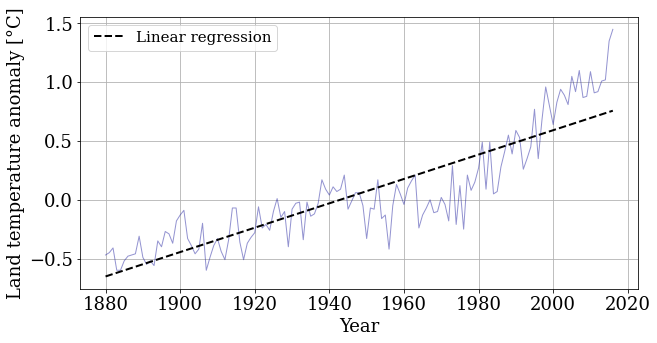

In [24]:
reg = b + w * year

pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5)
pyplot.plot(year, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

데이터와 직선이 어느 정도 맞는 것을 확인할 수 있다.

# **2. Multiple Variable Linear Regression**

## 2.1 Multiple Features

먼저 notation부터 정의한다.
- $n$ = number of features(= dimension = attribute)
- $x^{(i)}$ = i번째 입력(= feature vector)
- $x_j^{(i)} = i번째 입력의 j번째 feature


feature가 여러 개이므로 hypothesis는

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

이다. 이때 $x_0=1$이다. 그리고 $x$와 $\theta$가 아래와 같기에

$$x=\begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_n \end{bmatrix} \in \mathbb{R}^{n+1}, \quad
\theta=\begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} \in \mathbb{R}^{n+1} \\
h_{\theta}(x) = \theta^Tx$$

으로 표현할 수 있다.


## 2.2 Feature Scaling

Feature scaling은 각 feature들을 비슷한 scale로 만드는 것이다. 예를 들어 집의 가격을 예측할 때, 방의 개수와 집의 크기가 feature로 주어진다면 $x_1 = size(0 ~ 2000 feet^2), \; x_2 = number of rooms(1 ~ 5)$이란 예시를 잡을 수 있다. 이러면 비슷한 영향력을 주기 위해 hypothesis는

$$h_{\theta}(x) = \theta_0 + 10\theta + 10000\theta$$

이런 식으로 가중치들의 차이가 커진다. 이렇게 되면 gradient descent할 때, 문제가 생긴다. $\theta_1$은 조금만 변해도 결과에 영향을 크게 미치지만 $\theta_2$는 크게 변해도 영향을 작게 미친다. 이렇게 되면 $\theta_1$ 방향의 기울기는 급격하기에 너무 많이 이동하고 반대로 $\theta_2$ 방향의 기울기는 완만하여 너무 적게 움직인다.

<center><img src="https://miro.medium.com/max/600/1*yi0VULDJmBfb1NaEikEciA.png"></center>


그렇기에 feature들의 영향력을 동등하게 주기 위해 normalize를 해야 한다. 방법은 크게 최소, 최대를 이용하는 방법과 평균과 표준편차를 이용하는 방법이 있다.

### min-max normalization
$$1) \quad x_i = {x_i \over max(x)} \; \Rightarrow \; 0 \leq x_i \leq 1 \\
2) \quad x_i = {x_i - min(x) \over max(x) - min(x)} \; \Rightarrow \; 0 \leq x_i \leq 1 \\
3) \quad x_i = {x_i - mid(x) \over max(x) - mid(x)} \; \Rightarrow \; -1 \leq x_i \leq 1 \quad (mid={max+min \over 2})$$


### Z-Score normalization
$$x_i={x_i - mean(x) \over std(x)}$$

이러면 평균이 0, 표준편차가 1이 나오게 된다. 평균과 표준편차를 이용한 normalize를 자주 사용한다. 왜냐하면 특이하게 크거나 작은 값들이 있으면 대부분의 값이 한쪽으로 쏠려버리기 때문이다.


## 2.3 Gradient Descent
먼저 feature가 1개였을 때를 다시 가져와보면

$$\theta_0 := \theta_0 - \alpha {1 \over m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) \\
\theta_1 := \theta_1 - \alpha {1 \over m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}$$

이다. 이를 이용해 여러 feature를 넣으면 gradient descent를 구할 수 있다.

$$\begin{aligned}
\theta_0 := \theta_0 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_0^{(i)} \quad (x_0 = 1) \\
\theta_1 := \theta_1 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_1^{(i)} \\
\theta_1 := \theta_1 - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_2^{(i)} \\
\vdots \\
\theta_j := \theta_j - \alpha {1 \over m} &\sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad (j=0, \cdots, n)
\end{aligned}$$


## 2.4 Polynomial Regression
이제 다시 feature가 1개인 경우를 생각해보자. 집의 크기와 집의 가격은 비례하지만 크기가 커질수록 가격의 증가폭은 작아진다. 그렇기에 앞에서 배운 simple linear regression을 그대로 사용하면 크기가 커질수록 예측값과 실제값의 차이는 기하급수적으로 커질 것이다. 

이때 그래프의 형태가 루트함수에 가까우므로 feature에 $\sqrt{size}$를 추가하여 multiple varialbe linear regression으로 풀어주면 된다. 그렇다면 hypothesis는 다음과 같이 나올 것이다.

$$h_{\theta}(x) = \theta_0 + \theta_1 (size) + \theta_2(\sqrt{size})$$

챕터 4장의 실습에서 한 번 더 다룰 것이니 참고바랍니다.

## 실습 1. auto miles per gallon(MPG)

### 1) Dataset
이번 과제에서 사용할 데이터셋은 자동차의 여러 기술적인 사양들을 고려하여 연비를 예측하는 MPG 데이터셋입니다. 먼저 데이터를 불러옵시다.

In [1]:
import pandas as pd
import seaborn
seaborn.set()

from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'data/auto_mpg.csv')

('data/auto_mpg.csv', <http.client.HTTPMessage at 0x2242f02d4f0>)

In [3]:
mpg_data = pd.read_csv('data/auto_mpg.csv')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


총 392개의 데이터가 있고 9개의 정보들이 있습니다. 

여기서 car name 은 object로 자동차의 이름을 담고 있습니다. 

그리고 origin은 int로 정수 형태이지만 이것이 만들어진 도시로 categorical 한 값입니다(ex. 서울 : 1, 경기 : 2, ... ). 

그렇기 때문에 이번에 linear regression을 할 때는 car name, origin, mpg 값은 제외하고 생각하도록 하겠습니다. 

In [5]:
y_col = 'mpg'
x_cols = mpg_data.columns.drop(['car name', 'origin', 'mpg'])

print(x_cols)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


### 2) Data exploration
linear regression을 진행하기 전에 먼저 자동차의 정보들과 연비와의 1대1 상관관계를 시각화하여 알아보겠습니다. 

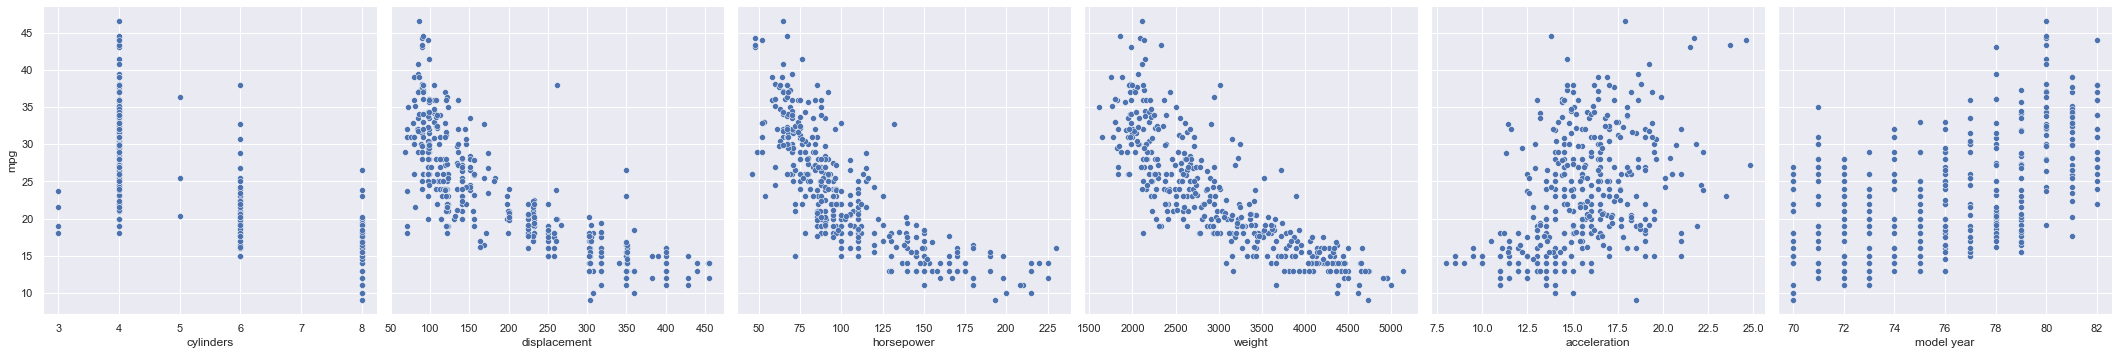

In [7]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1, x_vars=x_cols, y_vars=y_col);

Accerlation과 model_year의 정보는 비례하고 나머지는 반비례함을 알 수 있습니다. 이러한 상관관계를 통해서 linear model이 연비를 예측하는데 충분함을 알 수 있습니다.

### 3) Linear model in matrix form
앞서 배운 것을 이용하여 $\theta$를 $X$로, $h(x)$를 $\hat{y}$로 바꾸면 

$$\hat{y}=\sum_{i=0}^d w_i x_i = X^T W$$

으로 $X$는 입력 변수들로 이루어진 벡터, $W$는 입력 변수에 곱해지는 계수들로 이루어진 벡터입니다. 이를 행렬로 표현하면 

$$\hat{\mathbf{y}} = \begin{bmatrix}
\hat{y}^{(1)}  \\
\hat{y}^{(2)}\\
\vdots  \\
\hat{y}^{(N)}
\end{bmatrix} =
\begin{bmatrix}
x_0^{(1)} &  x_1^{(1)} & \cdots & x_d^{(1)} \\
x_0^{(2)} &  x_1^{(2)} & \cdots & x_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{(N)} &  x_1^{(N)} & \cdots & x_d^{(N)}
\end{bmatrix} \begin{bmatrix}
w_0  \\
w_1\\
\vdots  \\
w_d 
\end{bmatrix} 
= \mathbf{X}\mathbf{w}$$

입니다. 여기서 $\mathbf{x}$ 는 입력 변수들을 행렬의 형태로 나타낸 것입니다. 그리고 맨 앞에 $x_0 = 1$을 추가했었기 때문에 $\mathbf{X}$의 맨 왼쪽 행렬은 1로 이루어져 있습니다. 

그리고 $\hat{\mathbf{y}}$는 예측한 변수들을 모아놓은 벡터이고, $\mathbf{y}$는 실제 연비들을 모아놓은 벡터입니다. 

이제 이를 코드로 표현해보겠습니다.

In [8]:
from autograd import numpy
from autograd import grad

In [9]:
X = mpg_data[x_cols].values
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X)) # pad is to the left of input matrix
y = mpg_data[y_col].values

print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

X.shape = (392, 7), y.shape = (392,)


이제 cost function을 mean squared error를 사용하여 정의해보겠습니다.

$$L(y,\hat{y})={1 \over N} \sum_{i=1}^N (y^{(i)}-\hat{y}^{(i)})^2$$

cost function과 linear regression model을 코드로 나타내면 다음과 같습니다.

In [10]:
def linear_regression(params, X):
    '''
    The linear regression model in matrix form.
    Arguments:
        params: 1D array of weights for the linear model
        X     : 2D array of input values
    Returns:
        1D array of predicted values
    '''
    return numpy.dot(X, params)

def cost_function(params, model, X, y):
    '''
    The mean squared error loss function.
    Arguments:
        params: 1D array of weights for the linear model
        model : function for the linear regression model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
        float, mean squared error
    '''
    y_pred = model(params, X)
    return numpy.mean( numpy.sum((y-y_pred)**2) )

### 4) Find the weights using gradient descent
이제 gradient descent로 cost function을 최소로 해주는 계수를 찾아보겠습니다. autograd.grad() 함수로 기울기를 구해서 사용하겠습니다.

In [11]:
gradient = grad(cost_function)

이제 한 번 gradient descent를 진행해보면

In [13]:
max_iter = 30
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X, y)
    if i % 5 == 0:
        print(f"iteration {i}, loss = {loss}")

iteration 0, loss = 9.668521029386562e+18
iteration 5, loss = 5.933187473385039e+87
iteration 10, loss = 3.6409616934209154e+156
iteration 15, loss = 2.234313699411096e+225
iteration 20, loss = 1.37110964841974e+294
iteration 25, loss = inf


C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_8900/382964456.py:24: RuntimeWarning: overflow encountered in square
  return numpy.mean( numpy.sum((y-y_pred)**2) )


loss가 무한대로 넘어가 오류가 나타난 것을 알 수 있습니다. 왜 그럴까요?

### 5) Feature scaling
gradient descent를 진행했더니 loss가 무한대로 발산했습니다. 이것은 입력 변수들 중에 특정값들이 너무 커서 일어난 일입니다. 입력 데이터들의 max와 min 값을 한 번 출력해보겠습니다.

In [14]:
mpg_data[x_cols].describe().loc[['max', 'min']]

,cylinders,displacement,horsepower,weight,acceleration,model year
max,8.0,455.0,230.0,5140.0,24.8,82.0
min,3.0,68.0,46.0,1613.0,8.0,70.0


weight값을 보면 다른 값들에 비해 매우 큰 것을 알 수 있습니다. 그래서 우리는 값들을 비슷한 크기를 가지도록 바꿔줄 필요가 있습니다. 이번에 사용할 방법은 위에서 봤던 min-max scaling입니다. 최대 1, 최소 0으로 맞춰줍니다. 변환식을 다시 불러오겠습니다.

$$x' = \frac{x - \min(x)}{\max(x)-\min(x)}$$

우리는 이 normalization을 scikit-learn이라는 패키지를 이용해서 하도록 하겠습니다. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0], 1)), X_scaled))

pd.DataFrame(X_scaled).describe().loc[['max', 'min']]

,0,1,2,3,4,5,6
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0


이때, 0번째 행은 처음에 1을 추가해준 행이기에 유지되는 것이 맞습니다. 이제 scaling된 데이터로 다시 gradient descent를 해보겠습니다. 

In [16]:
max_iter = 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = cost_function(params, linear_regression, X_scaled, y)
    if i % 100 == 0:
        print(f"iteration {i}, loss = {loss}")

iteration 0, loss = 116081.11124253299
iteration 100, loss = 5035.737208606848
iteration 200, loss = 4694.653830594689
iteration 300, loss = 4613.631473760374
iteration 400, loss = 4583.327630964672
iteration 500, loss = 4568.155268087918
iteration 600, loss = 4559.2685938773875
iteration 700, loss = 4553.692765631067
iteration 800, loss = 4550.09985725416
iteration 900, loss = 4547.761957132872


학습된 params는 다음과 같으며 우리는 예측값을 params와 $X$의 곱으로 나타낼 수 있습니다.

In [17]:
print(params)
y_pred_gd = X_scaled @ params

[ 27.56342896  -1.24000064   1.70706502  -0.2853682  -23.08358717
   1.06664226   8.99271696]


### 6) How accurate is the model?
이제 우리가 만든 모델이 얼마나 정확한지 알아보도록 하겠습니다. Regression 문제에서는 주로 두 개의 기본 지표가 있습니다. Mean Absolute Error(MAE)와 Root Mean Squared Error(RMSE)입니다.

$$\text{MAE}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{N} \sum_{i=1}^N \left\vert y^{(i)} - \hat{y}^{(i)}\right\vert$$
$$\text{RMSE}(\mathbf{y}, \hat{\mathbf{y}}) =\sqrt{ \frac{1}{N} \sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2}$$

이 지표들도 scikit-learn 패키지를 통해서 사용해보겠습니다. 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred_gd)
rmse = mean_squared_error(y, y_pred_gd, squared=False)
print("MAE  = {}".format(mae))
print("RMSE = {}".format(rmse))

MAE  = 2.6139916011560445
RMSE = 3.4055205674118403


## 실습 2. Gradient descent land global temperature anomaly dataset
저번 챕터에서 사용한 anomaly dataset도 이용해보겠습니다.

In [20]:
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'data/land_global_temperature_anomaly-1880-2016.csv')

('data/land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x224311f2520>)

In [22]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

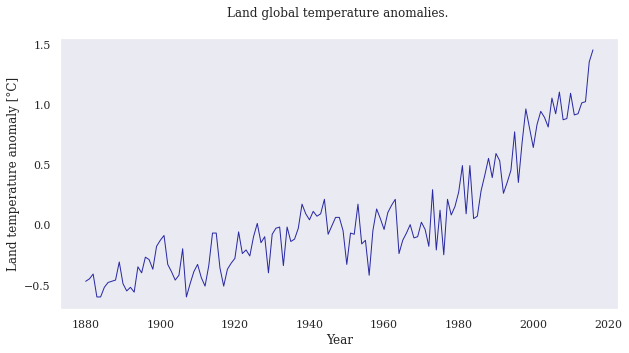

In [24]:
fname = 'data/land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

pyplot.rc('font', family='serif', size='18')
pyplot.figure(figsize=(10, 5))

# plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

저번 챕터는 직접 계산하는 방법으로 linear regression을 진행했습니다. 이번에는 gradient descent를 사용해보겠습니다. 먼저 직선을 정의합니다.

$$f(x_i) = wx + b$$

그리고 cost function 역시 정의해줍니다.

$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$

이제 코드를 이용해 계산해보겠습니다.

In [29]:
# cost function 정의
w, b, x, y = sympy.symbols('w b x y')
cost_function = (w * x + b - y)**2

grad_b = sympy.lambdify([w, b, x, y], cost_function.diff(b), 'numpy')
grad_w = sympy.lambdify([w, b, x, y], cost_function.diff(w), 'numpy')

w, b = 0, 0
for i in range(1000):
    descent_b = numpy.sum(grad_b(w, b, year, temp_anomaly)/len(year))
    descent_w = numpy.sum(grad_w(w, b, year, temp_anomaly)/len(year))
    w = w - descent_w * 0.001 # alpha is 0.001
    b = b - descent_b * 0.001
    
print(w)
print(b)

nan
nan


<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in multiply
  return 2*x*(b + w*x - y)
C:\Users\DELPHI~1\AppData\Local\Temp/ipykernel_8900/1121074269.py:12: RuntimeWarning: invalid value encountered in double_scalars
  w = w - descent_w * 0.001 # alpha is 0.001


이번에도 무한대로 발산했습니다. 이것도 위의 예시와 마찬가지로 입력 변수 간의 차이가 너무나 크기 때문에 일어난 문제입니다. 그래서 normalization을 진행하여 문제를 해결해보겠습니다. 이번엔 Z-Score normalization을 사용하겠습니다.

$$x' = \frac{x - \text{mean}(x)}{\text{std}(x)}$$

여기서 mean은 평균, std는 표준 편차입니다. 이를 사용해 gradient descent를 다시 진행해보겠습니다.

In [30]:
# Z-Score normalization
year_scaled = (year - year.mean()) / year.std()
temp_anomaly_scaled = (temp_anomaly - temp_anomaly.mean()) / temp_anomaly.std()

w, b = 0, 0
for i in range(1000):
    descent_b = numpy.sum(grad_b(w, b, year_scaled, temp_anomaly_scaled)) / len(year_scaled)
    descent_w = numpy.sum(grad_w(w, b, year_scaled, temp_anomaly_scaled)) / len(year_scaled)
    w = w - descent_w * 0.001
    b = b - descent_b * 0.001
    
print(w)
print(b)

0.756766964479979
5.551763428541569e-17


$w$와 $b$를 구했습니다. 이를 이용해 그래프에 그려보면 linear regression이 잘 된 것을 확인할 수 있습니다.

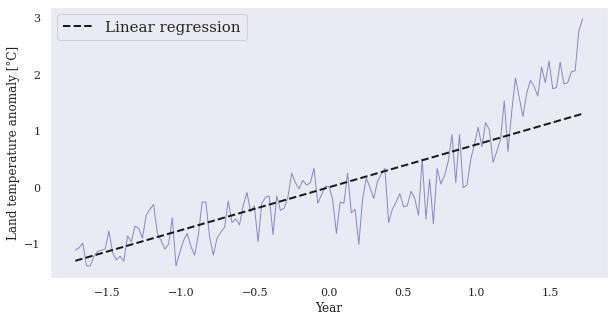

In [31]:
reg = b + w * year_scaled

pyplot.figure(figsize=(10, 5))

pyplot.plot(year_scaled, temp_anomaly_scaled, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_scaled, reg, 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

# **3. Logistic Regression**

불연속적인 값을 갖는 데이터들은 앞서 배운 linear regression을 사용할 수 없다. 예를 들어 스팸 메일의 분류 여부는 0(스팸) 또는 1(스팸아님)만 나오게 됩니다. 이러한 문제를 classification 문제라고 하며 이를 풀기 위해 logistic regression을 사용합니다.

## 3.1 Logistic Function


Logistic regression을 진행하기 위해서는 출력값을 0과 1로 맞추어야 합니다. 이를 위해 logistic function(sigmoid function)을 사용합니다.

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력값을 $\hat{y}$라고 하면 $x$는 두 가지 변환을 거쳐 $\hat{y}$가 된다.

$$z = wx + b \\ \hat{y} = \sigma(z)$$

우리의 목표는 $\hat{y}$가 실제 $y$가 가장 가깝도록 $w$와 $b$를 찾는 것입니다.

이제 코드를 통해서 logistic function을 알아봅시다.

In [1]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline

In [2]:
z = sympy.Symbol('z', real=True)

logistic = 1 / (1 + sympy.exp(0-z))
logistic

1/(1 + exp(-z))

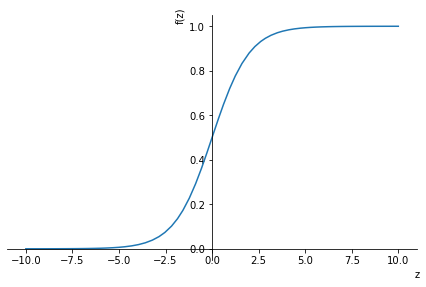

In [3]:
sympy.plotting.plot(logistic);

위 그래프를 보면 $z=0$일 때 출력값이 0.5가 됩니다. 그리고 양수일 때는 1에 가까워지고 음수일 때는 0에 가까워집니다. 즉, $z$값을 0과 1 사이로 표현할 수 있습니다. 

이제 데이터를 직접 만들어서 확인해보겠습니다.

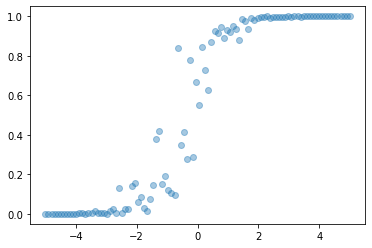

In [7]:
# synthetic data
x_data = numpy.linspace(-5, 5, 100)
w = 2
b = 1
numpy.random.seed(0)
z_data = w * x_data + b + numpy.random.normal(size=len(x_data))
y_data = 1 / (1 + numpy.exp(-z_data))

pyplot.scatter(x_data, y_data, alpha=0.4);

위 데이터는 전 챕터와 마찬가지로 조금의 noise를 추가해서 데이터를 생성한 것입니다. 

이 함수를 logistic regression하기 위해 실제 class를 정해주어야 합니다. numpy 패키지 안의 where 함수로 0.5보다 큰 값을 1, 작은 값을 0으로 클래스를 부여해 주겠습니다.

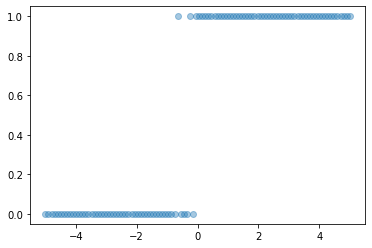

In [9]:
y_data = numpy.where(y_data >= 0.5, 1, 0)
pyplot.scatter(x_data, y_data, alpha=0.4);

## 3.2 Decision Boundary

Decision boundary는 두 클래스를 나누는 경계를 의미한다. 

<image src="https://www.oreilly.com/library/view/data-analysis-with/9781788393720/assets/b8521b37-5abf-4142-97d5-f1c8d4bb20cb.png">

그림에서 볼 수 있듯이, 경계가 직선일 필요는 없다.

## 3.3 Logistic Loss Function(Cost Function)

Logistic regression 문제를 해결할 때는 linear regression처럼 아래의 mean square error을 사용하면 안 된다. 

$$\frac{1}{n} \sum_{i=1}^n (y_i - \sigma(wx_i + b))^2$$

왜냐하면 logistic regression은 convec한 형태가 아니기 때문이다. 간단한 예시를 위해 $w = 1, b=0$일 때 

$(x, y) : (-1, 2), (-20, -1), (-5, 5)$ 데이터를 가지고 cost function을 그래프로 나타내면 다음과 같습니다.

In [11]:
badloss = (2 - 1/(1+ sympy.exp(-z)))**2 + \
          (-1 - 1/(1+ sympy.exp(-20*z)))**2  + \
          (5 - 1/(1+ sympy.exp(-5*z)))**2
badloss

(-1 - 1/(1 + exp(-20*z)))**2 + (2 - 1/(1 + exp(-z)))**2 + (5 - 1/(1 + exp(-5*z)))**2

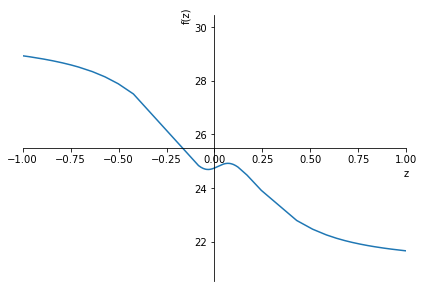

In [12]:
sympy.plotting.plot(badloss, xlim=(-1,1));

위에서 알 수 있듯 중간에 기울기가 0인 local minimum에 도달하여 멈추게 됩니다. 

그래서 mean square error말고 다른 방법을 찾기 위해 cost function의 의미를 다시 한번 생각해 보겠습니다. 

우리가 어떤 값을 예측할 때 많이 틀렸다면, 예측하는데 쓰인 변수들을 많이 바꾸어야 합니다. 그에 비해 조금 틀렸다면, 이미 잘 예측하고 있기 때문에 변수들을 조금 바꾸어야 합니다. 많이 바꾸고, 조금 바꾸는 것은 기울기의 크기가 정합니다. 이러한 원리를 사용해서 linear regression에서는 square error를 쓰는 것입니다. 

이 원리를 logistic regression에도 적용해 보겠습니다. 

$z = wx + b$ 일 때 cost function $L$을 b에 대해서 미분을 해보겠습니다. Chain rule을 사용하면 다음과 같게 됩니다. 

$$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{\sigma(z)}} \frac{\partial{\sigma(z)}}{\partial{z}}\frac{\partial{z}}{\partial{b}}$$

이 때 $\frac{\partial{z}}{\partial{b}}$는 1이 돼서 사라집니다. 

이제 $\frac{\partial{\sigma(z)}}{\partial{z}}$에 대해서 알아보겠습니다. 

In [14]:
lprime = logistic.diff(z)
lprime

exp(-z)/(1 + exp(-z))**2

위에서 나온 $\sigma'(z)$를 정리를 해보겠습니다. 


$$\frac{\partial{\sigma(z)}}{\partial{z}} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{1+e^{-z}} \times \frac{e^{-z}}{1+e^{-z}} = \sigma(z)\times \frac{e^{-z}}{1+e^{-z}} $$
가 되고, 여기서 $\frac{e^{-z}}{1+e^{-z}} $를 다시 정리해보면 다음과 같습니다. 

$$\frac{e^{-z}}{1+e^{-z}} = \frac{1 + e^{-z} -1}{1 + e^{-z}} = 1 - \frac{1}{1+e^{-z}} = 1-\sigma(z)$$

결론적으로, 
$$\sigma'(z) = \sigma(z) ( 1 - \sigma(z))$$
가 됩니다. 


다시한번 위 식을 정리해보면 다음과 같습니다. 


$$\frac{\partial{L}}{\partial{b}} = \frac{\partial{L}}{\partial{\sigma(z)}} \frac{\partial{\sigma(z)}}{\partial{z}} = \frac{\partial{L}}{\partial{\sigma(z)}} \sigma(z) (1-\sigma(z))$$

여기서 우리는 $\frac{\partial{L}}{\partial{b}}$의 값이 예측 값과 실제 값의 차이가 클수록 크고, 작을수록 작게 하고 싶기 때문에 $\frac{\partial{L}}{\partial{b}} = (y - \sigma(z))$로 정의하겠습니다. 정리하면 다음과 같습니다. 

$$\frac{\partial{L}}{\partial{\sigma(z)}} = \frac{(y-\sigma(z))}{\sigma(z)(1-\sigma(z))}$$

이제 위 식을 $L$에 대해서 코드를 통해서 정리해보겠습니다. 코드를 간단히 하기 위해서 $\sigma(z) = a$라고 치환해서 생각하겠습니다. 

In [15]:
a, y = sympy.symbols('a y', real=True)

In [16]:
dLda = (y - a)/a/(1 - a)
dLda

(-a + y)/(a*(1 - a))

In [17]:
L = sympy.integrate(dLda, a)
L

y*log(a) + (1 - y)*log(a + (1 - 2*y)/(2*y - 1))

In [18]:
sympy.simplify(L)

y*log(a) - (y - 1)*log(a - 1)

여기서 $a = \sigma(z)$이기 때문에 $ a < 1 $이 됩니다. 그래서 $\log$ 안의 값이 음수가 되면 안되기 때문에 식을 변환해 줍니다. 

In [19]:
L = -y*sympy.log(a) + (y-1)*sympy.log(1-a)
L

-y*log(a) + (y - 1)*log(1 - a)

우리가 구한 cost function $L$은 
$L = -y \log(a) + (y-1)\log(1-a)$ 이 됩니다. 

이제 실제로 차이가 클 때 $L$값이 커지는지 알아보도록 하겠습니다. 


먼저 만약 $y=1$이라면 $L = -\log(a)$만 남게 됩니다. 그래프로 표현하면 다음과 같습니다. 

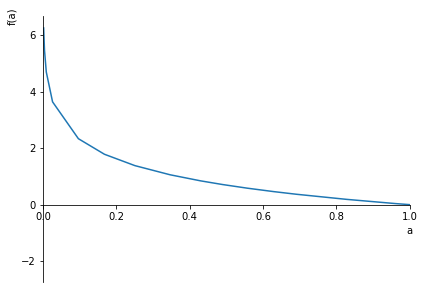

In [20]:
sympy.plotting.plot(-sympy.log(a), xlim=(0,1));

실제 class 가 1일 때 예측 값이 0에 가까워지면 cost function값이 커지고, 1에 가까워지면 cost function이 작아지는 것을 알 수 있습니다. 이는 우리가 원래 목표했던 것과 동일합니다. 

이제 $y=0$이라면 $L = \log(1-a)$ 만 남게 됩니다. 이를 또한 그래프로 표현하면 다음과 같습니다. 

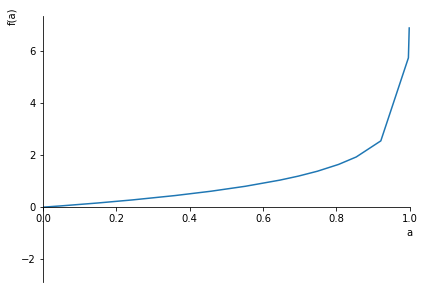

In [21]:
sympy.plotting.plot(-sympy.log(1-a), xlim=(0,1));

이번에도 예측값이 실제 값이랑 가까워지면 cost function값이 작아지고 멀어지면 커지게 됨을 알 수 있습니다. 

## 3.4 Gradient Descent

Gradient descent를 얻기 위해 cost function을 미분해야 합니다. 

$$J(\theta)_j = -\log\frac{1}{1+e^{-\theta_j x}}$$

$$\frac{\partial J(\theta_j)}{\partial \theta_j} = -\frac{e^{-\theta_j x}}{1 + e^{-\theta_j x}} x_j $$

그렇기에, 최종적으로 다음과 같은 식이 나옵니다.

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) \\
\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} $$

## 3.5 Find the parameters using autograd function

이제 logistic regression의 전체적인 과정을 코드로 알아보겠습니다.

In [23]:
logistic

1/(1 + exp(-z))

In [24]:
w, b, x, y = sympy.symbols('w b x y')
logistic = 1 / (1 + sympy.exp(-w * x - b))

Loss = -y * sympy.log(logistic) - (1 - y) * sympy.log(1 - logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

지금까지 diff를 통해 기울기를 구했습니다. 그런데 식이 복잡해질수록 속도가 느려지기 때문에 이번엔 autograd를 통해서 구해보겠습니다.

In [25]:
from autograd import numpy # import the autograd-wrapped version of numpy
from autograd import grad # import the gradient calculator

# note: the namespace numpy is the autograd wrapper to numpy
def logistic(z):
    """The logistic function"""
    return 1 / (1 + numpy.exp(-z))


def logistic_model(params, x):
    """A prediction model based on the logistic function composed with wx + b
    Arguments:
        params: array(w, b) of model parameters
        x: array of x data"""
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y


def log_loss(params, model, x, y):
    """The logistic loss function
    Arguments:
        params: array(w, b) of model parameters
        model: the python function for the logistic model
        x, y: arrays of input data to the model"""
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1 - y) * numpy.log(1 - y_pred))

In [26]:
# get a function to compute the gradient of the logistic loss
gradient = grad(log_loss)
type(gradient)

function

이때 grad 함수는 변수 개수만큼 output을 만들게 됩니다. 우리는 $w, b$ 2개의 변수가 있습니다. 먼저 예시로 랜덤으로 초기화한 변수를 넣어서 기울기값을 구해보겠습니다.

In [27]:
numpy.random.seed(0)
params = numpy.random.rand(2)
params

array([0.5488135 , 0.71518937])

In [28]:
gradient(params, logistic_model, x_data, y_data)

array([-0.42734877,  0.08274066])

이렇게 2개의 변수에 대해서 각각 기울기 값을 반환했습니다. 

이번엔 gradient descent를 진행할 때는 새로운 조건을 추가합니다. 우리가 정한 반복 수 외의 기울기 값이 0에 가까워지면 더이상 반복을 하지 않는 조건을 추가했습니다. 0에 가까운 값을 설정한 뒤, 그것보다 작아지면 while문이 멈추도록 설정하여서 gradient descent를 진행하겠습니다.

Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


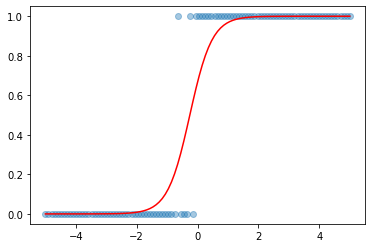

In [38]:
i = 0
max_iter = 5000
descent = numpy.ones(len(params))

while numpy.linalg.norm(descent) > 0.001 and i < max_iter:
    descent = gradient(params, logistic_model, x_data, y_data)
    params = params - descent * 0.01
    i += 1
    
print('Optimized value of w is {} vs. true value: 2'.format(params[0]))
print('Optimized value of b is {} vs. true value: 1'.format(params[1]))
print('Exited after {} iterations'.format(i))


pyplot.scatter(x_data, y_data, alpha=0.4)
pyplot.plot(x_data, logistic_model(params, x_data), '-r');

빨간 곡선이 우리의 모델이고 파랑점들이 실제 데이터입니다.

이제 기준값을 정하고 그것보다 크면 1, 작으면 0으로 분류하면 됩니다. 이번엔 0.5로 설정하겠습니다.

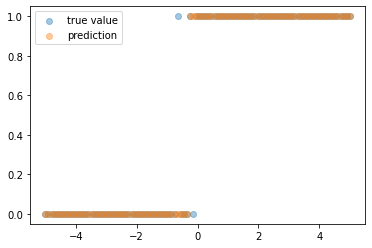

In [39]:
def decision_boundary(y):
    return 1 if y >= 0.5 else 0


def classify(preditcions):
    """
    Argument:
        prediction: an array of values between 0 and 1
    
    Returns:
        classified: an array of 0 and 1 values"""
        
    return decision_boundary(preditcions).flatten()


# 모든 점을 함수에 효율적으로 넣기 위해 vectorize 함수 사용(반복문은 오래 걸림)
decision_boundary = numpy.vectorize(decision_boundary)


pyplot.scatter(x_data, y_data, alpha=0.4, label='true value')
pyplot.scatter(x_data, classify(logistic_model(params, x_data)), alpha=0.4, label='prediction')
pyplot.legend();

거의 모든 데이터들을 정확하게 예측한 것을 볼 수 있습니다.

## 3.6 Multi-Class Classification

class가 세 가지 이상일 때, classification을 적용하는 방법은 크게 두 가지가 있다.


### One-vs-all(one-vs-rest)

임의의 것 하나와 다른 나머지 것에 대해 logistic regression을 모두 진행하는 방법이다. 밑의 그림을 보면 직관적으로 알 수 있다.

<img src="https://t1.daumcdn.net/cfile/tistory/262D0647578B05830C?download" height="500ptx" width="1000ptx">

$h_{\theta}^{(i)}(x)는 $i$일 확률입니다. 각 $i$에 대해 확률이 나오고 그 중, 가장 큰 확률을 가진 $i$로 예측합니다.

### Sofrmax function

k차원의 벡터에서 $i$번째 원소를 $z_i$, $i$번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 할 때, 소프트맥스 함수는 $p_i$를 다음과 같이 정의합니다.

$$p_i={e^{z_i}\over \sum_{j=1}^k e^{z_j}} \; for\;1,2,\cdots,k$$

3차원 문제를 예시로 들면 k = 3이므로 3차원 벡터 $z=[z_1,z_2,z_3]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.

$$softmax(z) = \Big[ {e^{z_1}\over \sum_{j=1}^3 e^{z_j}} {e^{z_2}\over \sum_{j=1}^3 e^{z_j}} {e^{z_3}\over \sum_{j=1}^3 e^{z_j}} \Big] = [p_1, p_2, p_3] = \hat{y} = 예측값$$

$p_1, p_2, p_3$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 0과 1 사이의 값으로 총합은 1이 된다.


# **4. Regularization**

## 4.1 The problem of overfitting & underfitting

feature가 너무 많으면 $J(\theta) \approx 0$으로 학습은 매우 잘 되지만 generalization이 되지 않습니다. 그렇기에 실제 데이터에 대한 예측값이 맞지 않습니다.

<img src="https://miro.medium.com/max/1266/1*_7OPgojau8hkiPUiHoGK_w.png" height="300px" width="800px">

<img src="https://miro.medium.com/max/1500/1*UCd6KrmBxpzUpWt3bnoKEA.png" height="300px" width="800px">

첫번째 사진은 linear regression, 두번째 사진은 logistic regression의 경우입니다.

이러한 overfitting을 해결하기 위해선 1) feature를 줄이고 2) regularization을 해주어야 합니다.

Regularization을 보기 전에 overfitting과 underfitting에 대해 더 살펴보겠습니다.



### Bias & Variance
Overfitting과 Underfitting을 알아보기 전에 먼저 Bias, Variance를 먼저 알아봅시다.

<img src="https://lh3.googleusercontent.com/rq_iMVSuIK1K4ykF9RQnF05hH6xxWm3lmNPWuQ3hfK9r4-3GBIuCxCW3L7QH53M3EIwbVWOcaRiRLDc0AIJ-0uq8-qzavpSWPceQ1lchq-ZPF16l3KLst24-x6MbGYFqQbEJmEI3gEc
" width="500" height="400" />

위 사진을 보면 쉽게 알 수 있습니다. Variance가 높으면 예측값들이 밀집해서 나오게 된다. 반대로 낮으면 예측값들이 흩뿌려져서 나오게 된다. Bias는 높으면 데이터가 전체적으로 중심을 잡지 못하고 낮으면 데이터의 중심을 잡을 수 있다.



### Underfitting
직선이 너무 간단한 경우 데이터가 흩뿌려져 있을 때는 그 데이터를 잘 설명하지 못합니다. 이것을 **Underfitting**되었다고 합니다. Underfitting에선 예측값이 high bias, low variance이기 때문에 좌측하단 그림에 해당합니다.



### Overfitting
모델이 너무 복잡한 경우입니다. 모든 training point를 지나게 되기에 training set에 대하여 loss는 아주 낮습니다. 그러나 새로운 데이터가 들어오면 training data와 비슷한 유형이여도 예측값은 실제값과 큰 차이를 가지게 된다. 이것을 **Overfitting**이라고 합니다. Overfitting에선 high variance, low bias이기 때문에 위 그렘에서 우측상단 그림에 해당합니다.

## 4.2 Regularization

Regularization은 overfitting을 막는 방법입니다. 먼저 우리의 기존 모델은 다음과 같습니다.

$$\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_dx_d$$

차수를 가진 항들이 모델을 복잡하게 만듭니다. 그래서 계수값에 제한 조건을 추가합니다. 보편적인 방법은 regularization term인 $\lambda \sum_{j=1}^d w_j^2$를 추가하는 것입니다. mean squared error를 사용한 cost function에 추가하면 다음과 같습니다. 

$$L(w) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

새롭게 만든 cost function은 계수가 커지면 두번째 항도 커지게 되어 cost가 커집니다. 그렇기에 계수들이 커질수록 값을 억누르게 됩니다.

위 식에서 $\lambda$는 regularization parameter입니다. $\lambda$는 우리가 얼마나 큰 제약을 줄 것인지 결정하게 됩니다. $\lambda$가 큰 값을 가질수록 더 억누르게 됩니다. 

이때, $w_0$은 regression term에 포함되지 않습니다. 왜냐하면 $w_0$은 y절편으로 이것까지 억누르면 0차항이 되어버리기 때문입니다.

그렇다면 regularization은 언제 사용해야 할까요? 즉, overfitting과 underfitting은 어떤 기준으로 구분할까요? 

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FVNGxb%2FbtqAv1XfTgH%2FjhebgUTjr5SCYgGSu62NRK%2Fimg.png">

위의 그림을 보면 training loss는 계수를 늘릴수록, $\lambda$를 줄일수록 줄어드는 것을 확인할 수 있습니다. 그러나 test loss는 어느 순간에 가장 낮고 다시 위로 치솟는 convex 형태를 띄고 있습니다. 이때 기울기가 0이 되는 가장 작은 loss를 가진 곳을 적당한 곳으로 봅니다. 즉, 위 그림처럼 적당한 지점을 기준으로 오른쪽은 overfitting, 왼쪽은 underfitting이 됩니다.

## 4.3 Gradient Descent in Regularization
그렇다면 regularization term이 추가됐을 때, gradient descent는 어떻게 작동할까요? 

먼저 regularization term이 추가된 cost function을 가져옵니다. 

$$ L(w) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

위 식에서 행렬 원소를 풀어서 쓴다면 다음과 같이 쓸 수 있습니다.

$$ L(w) = \frac{1}{N} \Big[ \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + \lambda \sum_{j=1}^d w_j^2 \Big] $$

이때, 앞부분은 이미 미분을 해봤고 뒤에 regularization term은 $x^2$ 꼴의 합을 미분하는 것과 같습니다. 그렇기에 gradient descent 식은 다음과 같이 나옵니다.

$$ w_j := w_j - \alpha \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + 2\lambda \sum_{j=1}^d w_j $$

이때 편미분된 regularization term은 앞서 편미분했던 term(위 식에서 두번째)과 항상 부호가 반대입니다. 그렇기에 억제할 수 있습니다. 또한 regularization term에 제곱형태를 넣는 것을 **L2 Regularization**이라고 합니다. 그리고 linear regression에서 L2 regularization을 사용하는 것을 **Ridge Regression**이라고 합니다.


만약 regularization term에 제곱이 아닌 절댓값을 넣는다면 cost function과 gradient descent 식은 다음과 같이 나옵니다. 

$$ L(w) = \frac{1}{N} \Big[ \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + \lambda \sum_{j=1}^d \lVert w_j  \rVert \Big] $$
$$ w_j := w_j - \alpha \sum_{i=1}^N (h_{w}x^{(i)} - y^{(i)}) + d\lambda $$

왜냐하면 절댓값은 1차이기에 앞에 $\lambda$만 남기 때문입니다. 이러한 regularization 방식을 **L1 Regularization**이라고 합니다. 그리고 linear regression에서 L1 regularization을 사용하는 것을 **Lasso Regression**이라고 합니다.

두 방식은 조금의 차이가 있습니다. 먼저 L1 regularization 방식은 $w_j$의 크기와 상관없이 동일한 크기로 억누릅니다. 그렇기에 $w_j$가 계속 작아지면 0으로 만듭니다.

L2 regularization 방식은 $w_j$ 크기와 비례하여 억누릅니다. 그렇기에 $w_j$가 크면 더 억누르고 작으면 덜 억누릅니다. 그렇기에 $w_j$가 아무리 작아져도 0에 수렴할뿐, 0이 되지 않습니다.

간단하게 표로 특징을 나타내면 다음과 같습니다.

||L1 regularization|L2 regularization|L1 + L2|
|-|-|-|-|
|변수선택|불가능|가능|가능|
|solution|closed form|명시해 없음|명시해 없음|
|특징1|변수간 상관관계가 높아도 좋은 성능|변수간 상관관계가 높으면 성능 $\downarrow$|변수간 상관관계를 반영한 정규화|
|특징2|크기가 큰 변수를 우선적으로 줄임|비중요 변수를 우선적으로 줄임|상관관계가 큰 변수를 동시에 선택/배제|


## 실습. Polynomial Regression & Regularization

### 1) Polynomial Regression을 이용하여 데이터 생성

$y = x_4 + x_3 - 4x_2$이란 polynomial function을 이용해서 데이터를 생성해보도록 하겠습니다. 이전 실습처럼 noise를 추가해서 생성하도록 하겠습니다.

In [2]:
from matplotlib import pyplot
from autograd import grad
from autograd import numpy

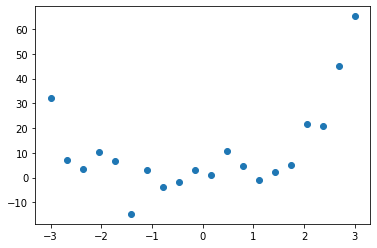

In [3]:
numpy.random.seed(0)
x = numpy.linspace(-3, 3, 20)
y = x**4 + x**3 - 4 * x**2 + 8 * numpy.random.normal(size=len(x))
pyplot.scatter(x, y);

우리가 생성한 데이터는 곡선의 형태이기에 직선으로 표현하는데 무리가 있습니다. 그래서 우리는 polynomial function을 사용해서 표현하도록 하겠습니다. 먼저 $d$차 곡선을 정의해보겠습니다. 

$$\hat{y} = w_0 + w_1x + w_2x^2 + \cdots + w_dx^d$$

$w$는 우리가 찾아야 할 계수들입니다. 그리고 우리의 목적은 주어진 $x, y$를 가장 잘 설명해주는 $w$를 찾는 것입니다. 

이제 위 식을 조금 변형하여 linear regression 문제처럼 바꾸겠습니다. $x_i=x^i$라고 정의하면 위 식은 다음과 같이 나타낼 수 있습니다.

$$\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_dx_d$$

이제 polynomial regression 문제가 multiple linear regression 문제와 동일해졌습니다. 이 역시 행렬의 형태로 나타낼 수 있습니다.

$$\hat{y} = \begin{bmatrix}\hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \cdots \\ \hat{y}^{(N)} \end{bmatrix}
= \begin{bmatrix} \hat{x}_0^{(1)} & \hat{x}_1^{(1)} & \cdots & \hat{x}_d^{(1)} \\
\hat{x}_0^{(2)} & \hat{x}_1^{(2)} & \cdots & \hat{x}_d^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
\hat{x}_0^{(N)} & \hat{x}_1^{(N)} & \cdots & \hat{x}_d^{(N)} \end{bmatrix}
\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_d \end{bmatrix}
=\mathbf{Xw}$$

이번 실습은 3차항까지 고려하여 실습을 진행하겠습니다.

In [4]:
degree = 3
def polynomial_features(x, degree):
    """Generate polynomial features for x"""
    X = numpy.empty((len(x), degree + 1))
    for i in range(degree + 1):
        X[:, i] = x**i
    return X

X = polynomial_features(x, degree)
print(X.shape)

(20, 4)


### 2) Scale the data & Train the model

이제 입력 변수들을 정규화시키고 학습을 진행해보도록 하겠습니다. 이번에는 scikit-learn 패키지 안에 있는 MinMaxScaler를 사용하겠습니다.

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled[:, 0] = 1 # the column for intercept


def linear_regression(params, X):
    """
    The linear regression model in matrix from.
    Arguments:
        params: 1D array of weights for the linear model
        X     : 2D array of input values
    Returns:
        1D array of predicted values
    """
    
    return numpy.dot(X, params)


def mse_loss(params, model, X, y):
    """ The mean squared error loss function
    
    Args:
        params: 1D array of weights for the linear model
        model : function for the linear regression model
        X     : 2D array of input values
        y     : 1D array of predicted values
    Returns:
        float, mean squared error
    """
    y_pred = model(params, X)
    return numpy.mean(numpy.sum((y - y_pred)**2))


gradient = grad(mse_loss)

max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i <= max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    
    if i % 100 == 0:
        print(f"iteration {i}, loss = {loss}, mae = {mae}")
    i += 1


iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1300.476847978767, mae = 6.885099348931474
iteration 200, loss = 1281.308959359777, mae = 6.863905338971364
iteration 300, loss = 1272.989696502466, mae = 6.807943451695349
iteration 400, loss = 1267.4477500708404, mae = 6.760476747247461
iteration 500, loss = 1263.7497451381246, mae = 6.721622404779564
iteration 600, loss = 1261.2821441357041, mae = 6.689879731162117
iteration 700, loss = 1259.6355657998567, mae = 6.663949878547804
iteration 800, loss = 1258.5368386500604, mae = 6.642768513961068
iteration 900, loss = 1257.8036810933152, mae = 6.625466061127554
iteration 1000, loss = 1257.3144604500353, mae = 6.611332180986305
iteration 1100, loss = 1256.988013787092, mae = 6.5997866175015245
iteration 1200, loss = 1256.7701827834119, mae = 6.5903553760560865
iteration 1300, loss = 1256.6248287285202, mae = 6.582651263968432
iteration 1400, loss = 1256.5278370197354, mae = 6.576357994582585
iteration 

이제 학습된 parameter들을 보겠습니다.

In [6]:
params

array([-22.51573787,   6.7592435 ,  41.30788734,  30.01067976])

원래 데이터와 함께 그래프로 표현해보겠습니다.

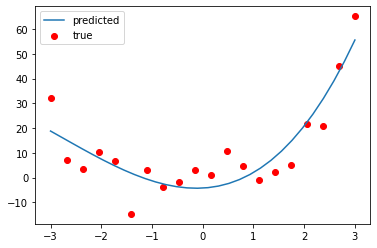

In [7]:
xgrid = numpy.linspace(x.min(), x.max(), 30)
Xgrid_poly_feat = polynomial_features(xgrid, degree)
Xgrid_scaled = min_max_scaler.transform(Xgrid_poly_feat)
Xgrid_scaled[:, 0] = 1

pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@params, label='predicted')
pyplot.legend();

In [8]:
from _util.plot_helpers import interact_polyreg

max_degree = 15
interact_polyreg(max_degree, x, y)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

### 3) Regularization

앞서 구한 L2 regularization의 식은 아래와 같습니다.

$$L(\mathbf{w}) = \frac{1}{N} \lVert \mathbf{y} - \mathbf{Xw} \rVert^2 + \lambda \sum_{j=1}^d w_j^2$$

이번 실습에선 위 식을 이용하여 regularization 해보겠습니다. $\lambda$는 1로 설정하겠습니다.

In [9]:
def regularized_loss(params, model, X, y, _lambda=1.0):
    """
    The mean squared error loss function with an L2 penalty.

    Args:
        params : 1D array of weights for the linear model
        model  : function for the linear regression model
        X      : 2D array of input values
        y      : 1D array of predicted values
        _lambda: regularization parameter, default 1.0

    Returns:
        float, regularized mean squared error
    """
    y_pred = model(params, X)
    return numpy.mean(numpy.sum((y - y_pred)**2)) + _lambda * numpy.sum(params[1:]**2)


gradient = grad(regularized_loss)

In [10]:
no_regularization_params = params.copy()

In [11]:
max_iter = 3000
alpha = 0.01
params = numpy.zeros(X_scaled.shape[1])
descent = numpy.ones(X_scaled.shape[1])
i = 0

from sklearn.metrics import mean_absolute_error

while numpy.linalg.norm(descent) > 0.01 and i <= max_iter:
    descent = gradient(params, linear_regression, X_scaled, y)
    params = params - descent * alpha
    loss = mse_loss(params, linear_regression, X_scaled, y)
    mae = mean_absolute_error(y, X_scaled@params)
    
    if i % 100 == 0:
        print("iteration {}, loss = {}, mae = {}".format(i, loss, mae))
    i += 1

iteration 0, loss = 5434.767518111348, mae = 11.05718775676392
iteration 100, loss = 1785.9852202374186, mae = 6.983886996350374
iteration 200, loss = 1764.2597057711023, mae = 6.966518785947395
iteration 300, loss = 1763.5702631188328, mae = 6.965728405272657


이제 regularization을 추가한 것과 추가하지 않은 것을 비교해보겠습니다.

weights without regularization
[-22.51573787   6.7592435   41.30788734  30.01067976]
weights with regularization
[-11.13750882  12.48522096  28.26626633  11.09211867]


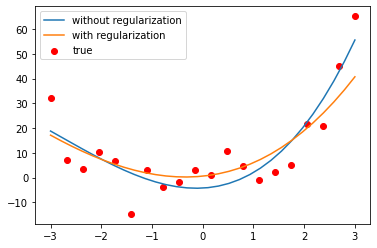

In [13]:
print("weights without regularization")
print(no_regularization_params)
print("weights with regularization")
print(params)

pyplot.scatter(x, y, c='r', label='true')
pyplot.plot(xgrid, Xgrid_scaled@no_regularization_params, label='without regularization')
pyplot.plot(xgrid, Xgrid_scaled@params, label='with regularization')
pyplot.legend();

더 다양한 차수에서 regularization을 비교해 보겠습니다.

In [14]:
interact_polyreg(max_degree, x, y, regularized=True)

interactive(children=(IntSlider(value=8, description='degree', max=15, min=1), Output()), _dom_classes=('widge…

Degree가 커질수록 regularization의 중요성이 들어나게 됩니다. 높은 차수에서 예측 모델이 이리저리 움직이는 모습이 아닌 부드럽게 학습 데이터들을 지나가는 모습을 볼 수 있습니다. 이제 새롭게 들어오는 데이터도 잘 예측할 수 있습니다.

# **5.**